## p-hacking

### Goal

The goal of this exercise is to illustrate the phenomenon of p-hacking. We will show that it is possible to find correlations between a given dataset and a random variable yielding a p-value of less than 0.05. We will do so without manipulating data but rather by succumbing to research bias, excitement, and some misunderstanding of statistics interpretation.

### Summary

In this notebook we will use data from the file "brainsize.csv" which contains information about IQ, body weight and height, and brain volume measured with MRI counts of non-dark voxels.
We will generate a random vector from a gaussian random seed (mean 50 and standard deviation 20) and see whether the data we have has a significant correlation with it through some model, ideally leading to a p-value of less than 5%

### Analysis

First let's load the packages we will need for this analysis : pandas, numpy, statsmodel, scipy and matplotlib.

In [1]:
# Load Packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as sp
import matplotlib.pyplot as plt

Let us load the data from "brainsize.csv", store it as a pandas DataFrame, and take a look at its content.

In [2]:
brainsize = pd.read_csv("brainsize.csv",delimiter=';')
del brainsize['Unnamed: 0'] # We delete a column that is irrelevant to the problem
N=len(brainsize)
brainsize.head(N)

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118,64.5,816932
1,Male,140,150,124,.,72.5,1001121
2,Male,139,123,150,143,73.3,1038437
3,Male,133,129,128,172,68.8,965353
4,Female,137,132,134,147,65.0,951545
5,Female,99,90,110,146,69.0,928799
6,Female,138,136,131,138,64.5,991305
7,Female,92,90,98,175,66.0,854258
8,Male,89,93,84,134,66.3,904858
9,Male,133,114,147,172,68.8,955466


We see that some data is missing (marked as a '.'). A better practice is to replace it by NaN

In [3]:
# We see some data missing being marked as '.' -> Replace it by NaN
brainsize = brainsize.replace('.', np.nan)

Let us create a random vector that we will call partY, being normally distributed with a mean of 50 and standard deviation of 20. Let's add it to the DataFrame we're working on.

In [4]:
# Add a first random variable partY : partY=np.random.normal(50,20,N)

partY=[49.16644137,37.03471765,29.22887655,61.20606395,51.96142736,58.10181611,46.7040757,50.58690401,38.74156167,39.55930919,56.93800092,32.79429376,30.85348657,77.48158731,42.65547849,49.04350322,41.89629502,50.6620056,66.57234694,35.81018935,25.60947682,72.57776781,70.91273488,56.78863838,36.19940034,74.61400111,54.49683027,65.54541445,47.70904622,61.47346262,60.57710421,24.65637482,43.12068662,63.84993811,51.41007177,47.10884122,45.42721919,49.14302235,69.89932837,36.22892975]
brainsize['partY'] = partY

Let's try to fit a linear model by asking partY to be fitted as a function of the following columns that seemed relevant to the problem : MRI_Count, FSIQ, VIQ, PIQ since they represent Brain Volume and IQ, which are known to be good predictors for anything in neuroscience ...

In [5]:
# Train a multilinear model for partY prediction from MRI_Count, FSIQ, VIQ, PIQ
model = smf.ols('partY ~ MRI_Count + FSIQ + VIQ + PIQ', data=brainsize).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  partY   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9756
Date:                Fri, 29 May 2020   Prob (F-statistic):              0.433
Time:                        16:30:50   Log-Likelihood:                -159.32
No. Observations:                  40   AIC:                             328.6
Df Residuals:                      35   BIC:                             337.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.6778     28.343      3.517      0.0

(Let us pretend that we didn't see the metric "Prob (F-statistic): 0.433" and try to make our analysis output "a p-value" of less than 0.05)

Let us focus on the multilinear model coefficients :

Intercept     99.6778,
MRI_Count  -5.372e-05,
FSIQ           0.7772,
VIQ           -0.3567,
PIQ           -0.4400

From those we will build our predictor for partY : -5.372e-05 x MRI_Count + 0.7772 x FSIQ - 0.3567 x VIQ - 0.4400 x PIQ + 99.6778

In [6]:
y_predicted = np.asarray(-5.372e-05*brainsize['MRI_Count']+0.7772*brainsize['FSIQ']-0.3567*brainsize['VIQ']-0.4400*brainsize['PIQ']+99.6778)

Let us compute a Pearson's correlation between the predicted vector and the actual vector :

Pearson's r [PartY] =  0.3167169327628138
p-value [PartY] =  0.04646270480311824


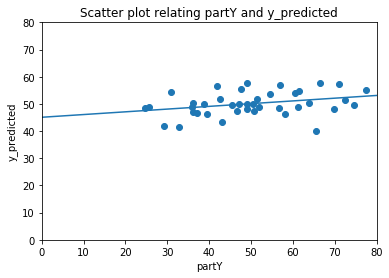

In [7]:
# Pearson's correlation coefficient and associated p-value
r, p = sp.stats.pearsonr(y_predicted,partY)
print("Pearson's r [PartY] = ",r)
print("p-value [PartY] = ",p)

plt.figure(1)
plt.scatter(partY, y_predicted)
plt.title('Scatter plot relating partY and y_predicted')
plt.xlabel('partY')
plt.ylabel('y_predicted')
plt.xlim(0, 80)
plt.ylim(0, 80)
m, b = np.polyfit(partY,y_predicted, 1)
x = np.array([0,80])
plt.plot(x,m*x+b)
plt.show()

(Let's pretend that we didn't see the value of Pearson's R which corresponds to a low correlation in reality. It is still non-zero though !)

We can see that the model we built yields a p-value of 0.046 which is less than 0.05, thus we can conclude that :

1. There is a significant correlation between Brain Size,IQ and the new phenomenon partY. If there wasn't such a relationship, no model could yield a p<0.05 and we found one !

2. Our model predicts consistently the new phenomenon partY (see the linear fit in the scatter plot), which will make us famous for having discovered a new psychological and cognitive trait to add to the next edition of the DSM ... From now on it will be enough to get the MRI of someone and make him pass an IQ test to predict that he has the new disorder partY.

Oh, we didn't use gender, weight and height in our model because they are not relevant in the context of our study.
They were recorded for administrative purpose ...






We submitted our new findings to a serious journal with Jean-Baptiste Poline as a peer-reviewer, but our paper got rejected and we don't understand why ! 

Professor Poline says that he couldn't reproduce our results and we are quite surprised since we got a p-value of less than 0.05 !

Professor Poline says that out model doesn't work with his measure of partY, that he calls partY2, even though he assures that he measured partY exactly the same way we did (same machine, same preprocessing)

He provided us his results with his measures :

In [8]:
# Add a second random variable partY2 : partY2=np.random.normal(50,20,N)

partY2=[49.95969367,27.98988465,40.6969478,66.84422947,21.89712288,46.28770742,68.7440651,50.73995944,50.94500417,29.19459461,47.09900811,45.84432981,39.34383394,19.2493662,74.01498786,59.58219786,69.18273254,38.39913085,36.91416637,33.85480659,41.78321472,70.05555154,71.81046433,12.24348989,46.54292554,64.52592382,38.68515676,46.47969269,24.71271463,40.72674837,69.5371685,82.02633955,73.30074217,36.05179964,44.31815509,59.8466495,60.3448255,54.4307475,48.2810806,50.63390224]
brainsize['partY2'] = partY2

r2, p2 = sp.stats.pearsonr(y_predicted,partY2)
print("Pearson's r [PartY2] = ",r2)
print("p-value [PartY2] = ",p2)

Pearson's r [PartY2] =  0.01506335253869396
p-value [PartY2] =  0.9264969009397449


He also provided a histogram to suggest that his data has the same distribution as ours

(0, 10)

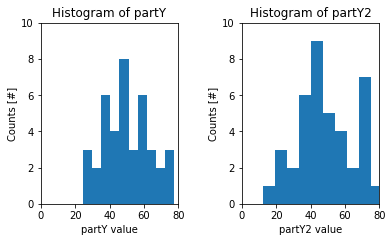

In [9]:
plt.figure(2)
plt.subplot(1,2,1)
plt.hist(partY)
plt.xlabel("partY value")
plt.ylabel("Counts [#]")
plt.title("Histogram of partY")
plt.xlim(0, 80)
plt.ylim(0, 10)
plt.subplot(1,2,2)
plt.hist(partY2)
plt.xlabel("partY2 value")
plt.ylabel("Counts [#]")
plt.title("Histogram of partY2")
plt.tight_layout(pad=3.0)
plt.xlim(0, 80)
plt.ylim(0, 10)

As partY2 and partY follow a similar distribution, we are quite surprised that our model couldn't fit well partY2 since it does really well for partY.

We got accused of p-hacking even though we did a serious work of unbiased data collection and found a good model with significant p-value.

We decided to resign from submitting this paper until we get to go back to our statistics courses. We would call ourselves lucky that we didn't get sued for scientific misconduct and uncompetence.
We will be careful next times that we pretend to have found a model or a significant correlation, especially if p<0.05 !

(For those interested, see a similar scientific bias that is famous in Physics : https://en.wikipedia.org/wiki/N_ray)